In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Loading the dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/car_price_prediction.csv')
print(df)

             ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    M

Displaying the first five rows of the dataset

In [5]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Displaying the last five rows of the dataset

In [6]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


Checking the null values in the dataset

In [7]:
df.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


Describe the dataset in a tabular form

In [8]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Displaying the graphs

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

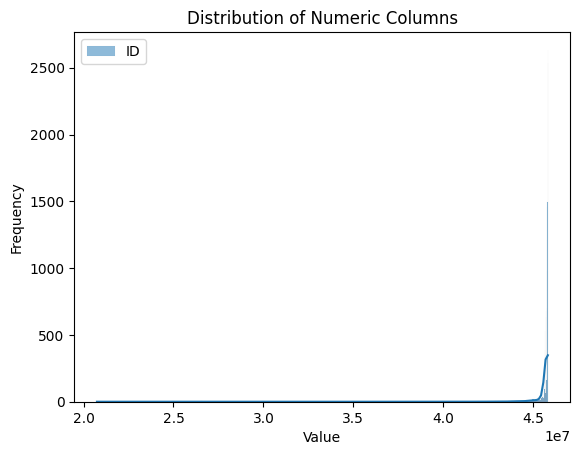

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


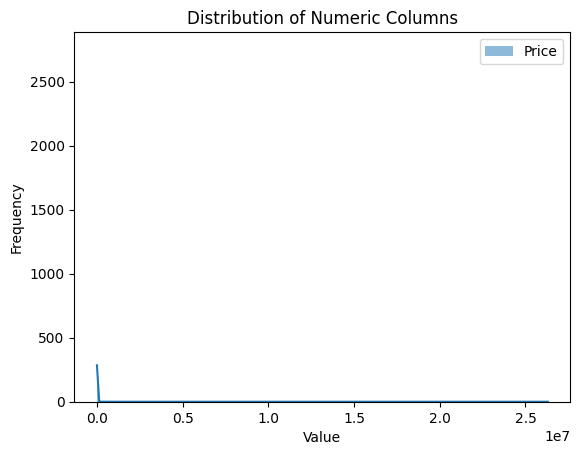

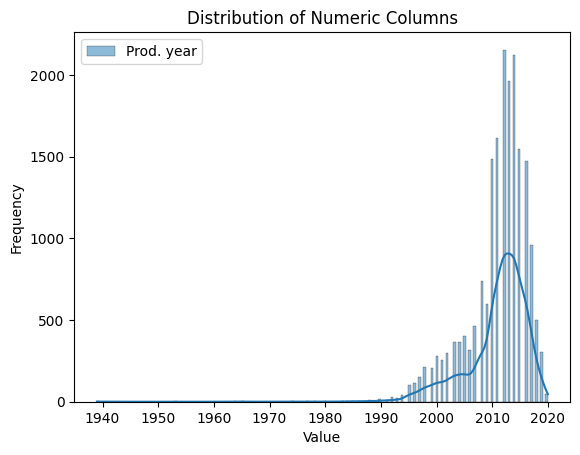

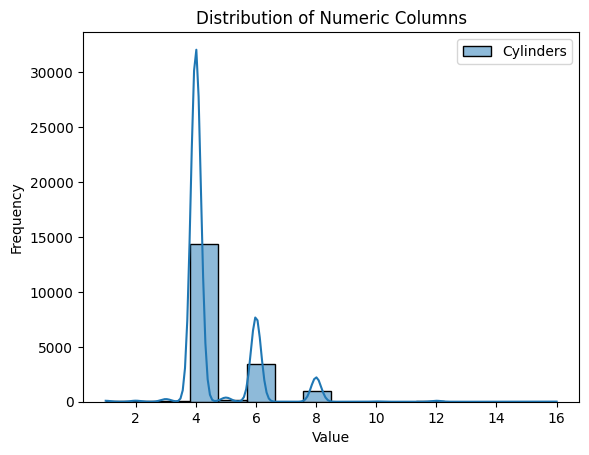

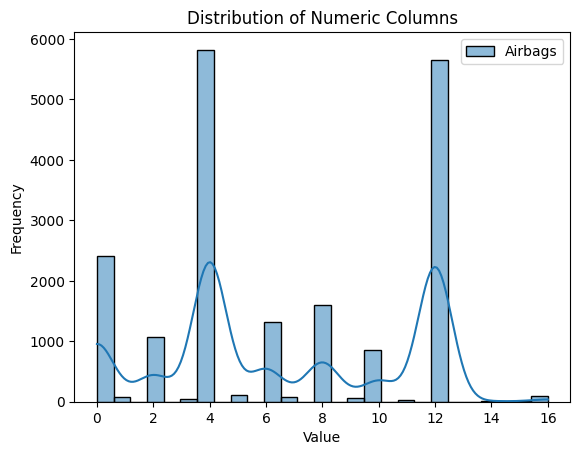

In [10]:
for col in numeric_cols:
    sns.histplot(df[col], label=col, kde=True, alpha=0.5)
    plt.title("Distribution of Numeric Columns")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

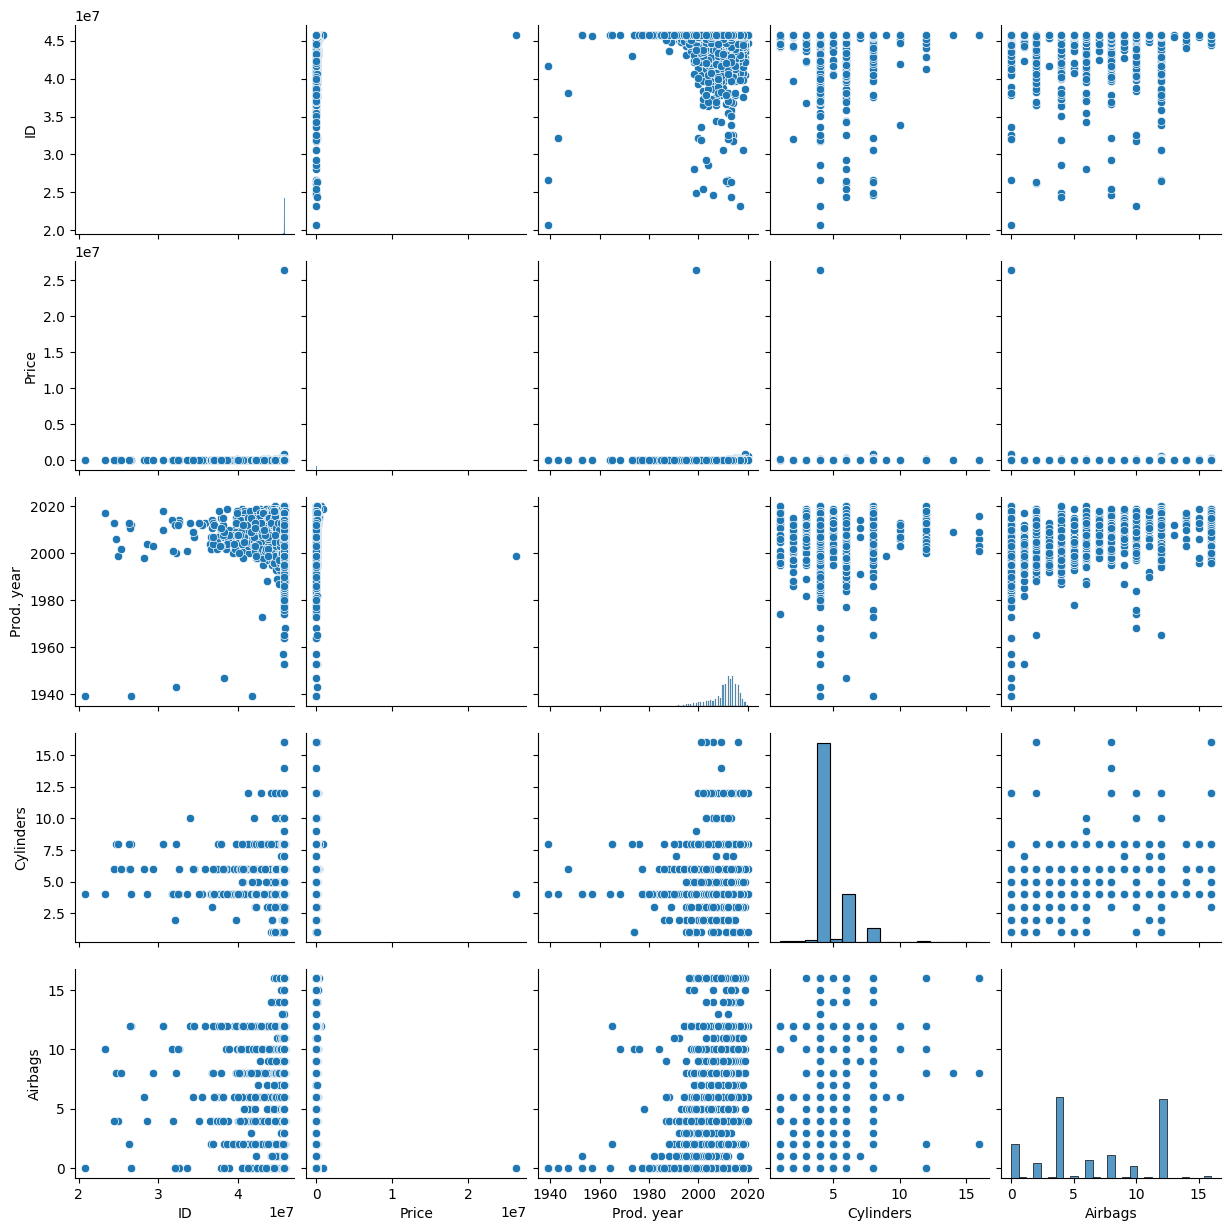

In [11]:
sns.pairplot(df[numeric_cols])
plt.show()

Displaying the first five rows of the dataset

In [12]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Normalizing the dataset

In [13]:
minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
print(df_normalized)

             ID     Price  Prod. year  Cylinders  Airbags
0      0.993528  0.000507    0.876543   0.333333   0.7500
1      0.956715  0.000632    0.888889   0.333333   0.5000
2      0.998315  0.000322    0.827160   0.200000   0.1250
3      0.998107  0.000137    0.888889   0.200000   0.0000
4      0.999705  0.000446    0.925926   0.200000   0.2500
...         ...       ...         ...        ...      ...
19232  0.999270  0.000322    0.740741   0.200000   0.3125
19233  0.998492  0.000596    0.888889   0.200000   0.5000
19234  0.999535  0.000992    0.876543   0.200000   0.2500
19235  0.999077  0.000203    0.839506   0.200000   0.2500
19236  0.999865  0.000018    0.901235   0.200000   0.7500

[19237 rows x 5 columns]


In [14]:
df_normalized.head()

,ID,Price,Prod. year,Cylinders,Airbags
0,0.993528,0.000507,0.876543,0.333333,0.750
1,0.956715,0.000632,0.888889,0.333333,0.500
2,0.998315,0.000322,0.827160,0.200000,0.125
3,0.998107,0.000137,0.888889,0.200000,0.000
4,0.999705,0.000446,0.925926,0.200000,0.250


Remove outliers from the dataset

In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [16]:
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)
    print(df)

             ID  Price  Levy   Manufacturer     Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS    RX 450        2010       Jeep   
2      45774419   8467     -          HONDA       FIT        2006  Hatchback   
3      45769185   3607   862           FORD    Escape        2011       Jeep   
4      45809263  11726   446          HONDA       FIT        2014  Hatchback   
5      45802912  39493   891        HYUNDAI  Santa FE        2016       Jeep   
...         ...    ...   ...            ...       ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ   CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI    Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI    Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET   Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI    Sonata        2012      Sedan   

      Leather interior Fuel type Engine

Describing the dataset

In [17]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.099700e+04,10997.000000,10997.000000,10997.0,10997.000000
mean,4.576573e+07,14874.377376,2012.345003,4.0,6.176866
std,5.496347e+04,11456.641191,3.581371,0.0,4.103328
min,4.554293e+07,1.000000,2002.000000,4.0,0.000000
25%,4.574547e+07,5959.000000,2011.000000,4.0,4.000000
50%,4.578816e+07,13485.000000,2013.000000,4.0,4.000000
75%,4.580348e+07,20817.000000,2015.000000,4.0,12.000000
max,4.581665e+07,47042.000000,2020.000000,4.0,16.000000


Save the cleaned the dataset

In [18]:
df.to_csv('cleaned_car_price_data.csv', index=False)

In [19]:
sns.set(style="whitegrid")

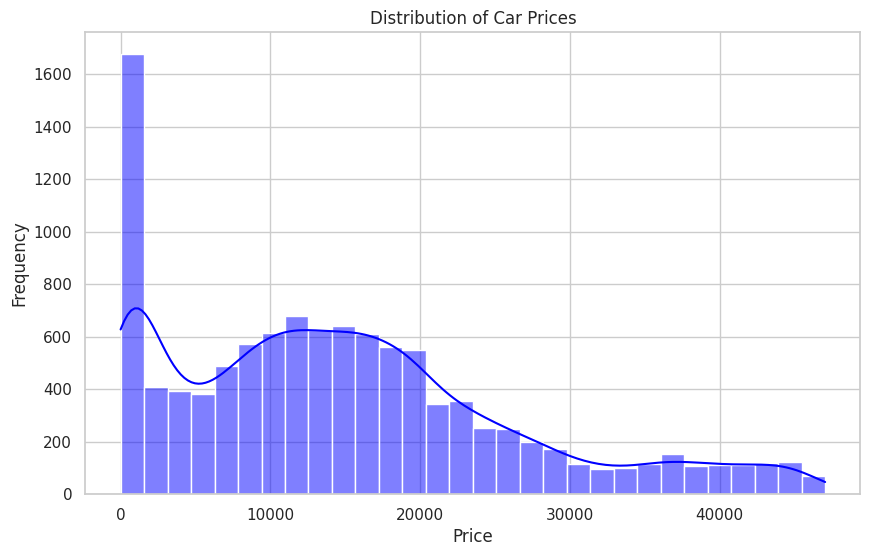

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

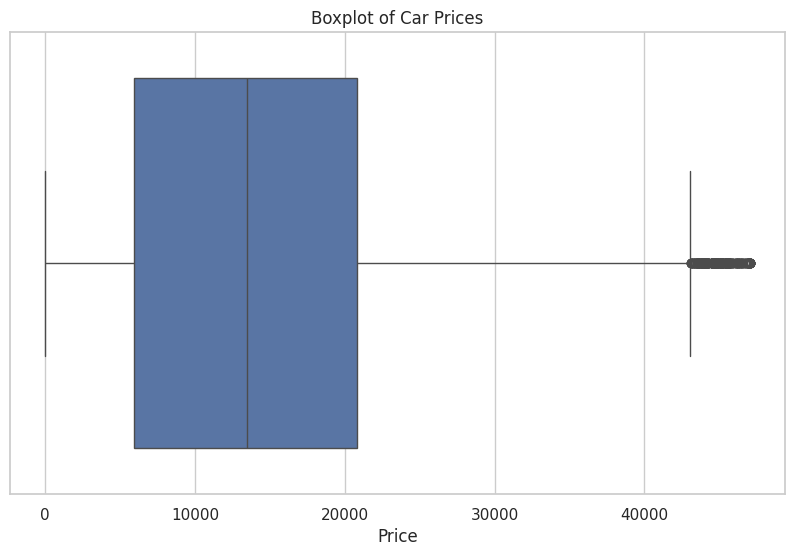

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()

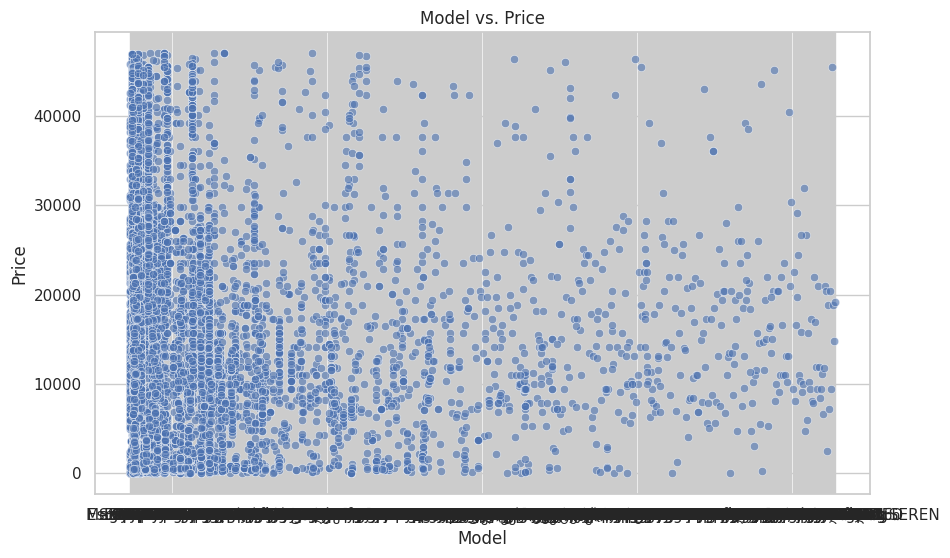

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model', y='Price', data=df, alpha=0.6)
plt.title('Model vs. Price')
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

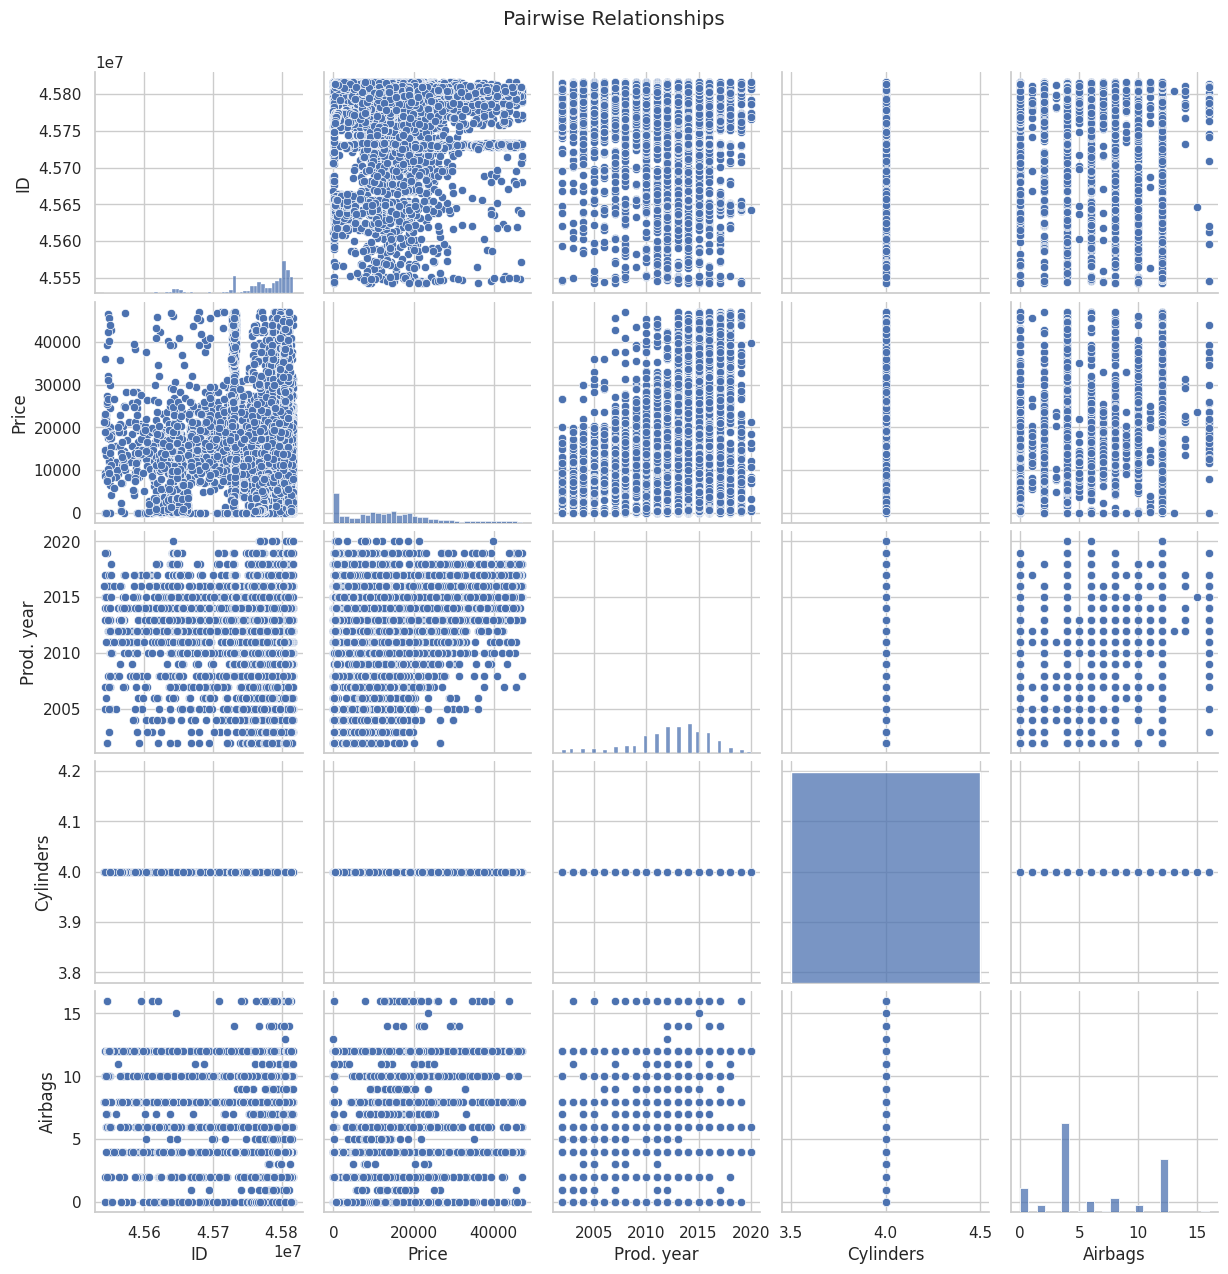

In [23]:
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()